In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.preprocessing import StandardScaler as Sc

In [9]:
#this is the dataframe with all of the zip code level data from new york.

df = pd.read_csv('CovidDataCleaned')

In [13]:
def trainDecisionTree(df,FeaturesToUse,predictionVariable,max_depth = 10,plot = True):
    """
    -df is the dataframe with new york data
    -FeaturesToUse is a list of variables we want to use to predict the predictionVariable
    -predicitonVariable is the variable we want to predict
    -max depth is the depth of the decision tree
    """
    
    
    
    assert predictionVariable not in FeaturesToUse, "Remove the predictionVariable from FeaturesToUse"
    
    if len(FeaturesToUse) ==1:
        xTrain = df[FeaturesToUse[0]].values.reshape(-1,1)
    
    else:
        xTrain = df[FeaturesToUse].values
    
    yTrain = df[predictionVariable].values
    
    
    model = DTR(max_depth = max_depth)
    model.fit(xTrain,yTrain)
    
    plt.figure()
    plt.title('Feature Importances for Predicting '+str(predictionVariable))
    plt.bar(FeaturesToUse,np.abs(model.feature_importances_))
    plt.xticks(range(len(FeaturesToUse)),FeaturesToUse, rotation=90)
    
    plt.ylabel('Feature Importance')
#     plt.savefig('FeatureImportanceDecisionTree'+str(predictionVariable)+'.pdf', bbox_inches = "tight")
    # UNCOMMENT HERE IF YOU WANT TO SAVE THE FIGURE AS A PDF

    plt.show()
    return model
    
    
    
def trainLinearModel(df,FeaturesToUse,predictionVariable,plot = True):
    
    """
    -df is the dataframe with new york data
    -FeaturesToUse is a list of variables we want to use to predict the predictionVariable
    -predicitonVariable is the variable we want to predict
    """
    
    
    #if len FeaturesToUse == 1 then we will plot the scatter plot and the line of best fit
    #instead of feature importances. 
    
    assert predictionVariable not in FeaturesToUse, "Remove the predictionVariable from FeaturesToUse"
    
    if len(FeaturesToUse) ==1:
        xTrain = df[FeaturesToUse[0]].values.reshape(-1,1)
    
    else:
        xTrain = df[FeaturesToUse].values
    
    yTrain = df[predictionVariable].values
    
    scaler = Sc()
    scaler.fit(xTrain)
    xTrain = scaler.transform(xTrain)
    
    
    model = lr()
    model.fit(xTrain,yTrain)
    
    if len(FeaturesToUse) ==1:
        #plot scatter plot
        xvals = np.linspace(min(xTrain),max(xTrain),100)
        yvals = xvals*model.coef_[0] +model.intercept_
        
        
        plt.figure()
        plt.plot(xvals,yvals,label = 'Line of Best Fit')
        plt.scatter(xTrain,yTrain)
        plt.xlabel(FeaturesToUse[0]+' (Normalized)')
        plt.ylabel(predictionVariable)
        #plt.savefig('ScatterPlot'+predictionVariable'.pdf')
        
    else:
        #plot feature importances
        plt.figure()
        plt.title('Feature Importances for Predicting '+str(predictionVariable))
        plt.bar(FeaturesToUse,np.abs(model.coef_))
        plt.xticks(range(len(FeaturesToUse)),FeaturesToUse, rotation=90)
        
        plt.ylabel('Feature Importance')
    #     plt.savefig('FeatureImportanceLinearRegression'+str(predictionVariable)+'.pdf', bbox_inches="tight")
        # UNCOMMENT HERE IF YOU WANT TO SAVE THE FIGURE AS A PDF

        plt.show()
        
        
    return model
    
    
    
    

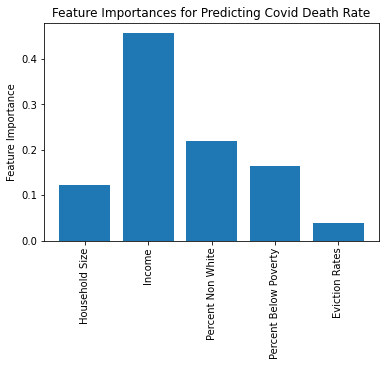

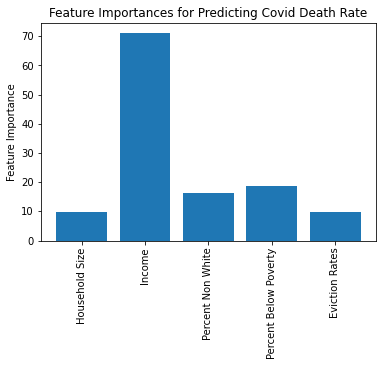

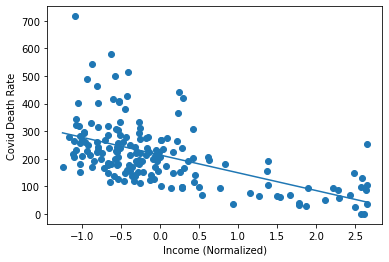

In [16]:

FeaturesToUse = ['Household Size', 'Income','Percent Non White', 'Percent Below Poverty', 'Eviction Rates']
predictionVariable = 'Covid Death Rate'
decisionTree = trainDecisionTree(df,FeaturesToUse, predictionVariable)

linearModel = trainLinearModel(df,FeaturesToUse,predictionVariable)

FeaturesToUse = ['Income']
linearmodel = trainLinearModel(df,FeaturesToUse,predictionVariable)


